In [1]:
import pandas as pd
import msc_project.utils.plot_utils as pu
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')

In [2]:
PATH_TEST23 = '/scratch/msc24h18/msc_project/results/test23/'
PATH_TEST31 = '/scratch/msc24h18/msc_project/results/test31/'
PATH_TEST32 = '/scratch/msc24h18/msc_project/results/test32/'
PATH_TEST42 = '/scratch/msc24h18/msc_project/results/test42/'
PATH_TEST46 = '/scratch/msc24h18/msc_project/results/test46/'
PATH_TEST50 = '/scratch/msc24h18/msc_project/results/test50/'
PATH_TEST52 = '/scratch/msc24h18/msc_project/results/test52/'

FIGURES_PATH = '/scratch/msc24h18/msc_project/results/report_figures/'

In [3]:
# class to simulate argparse argument object. will return None for any attribute that is not set
class Args:
    def __init__(self):
        self.aspect = 'auto'
        self.scale = 'linear'
    def __getattr__(self, name):
        return None

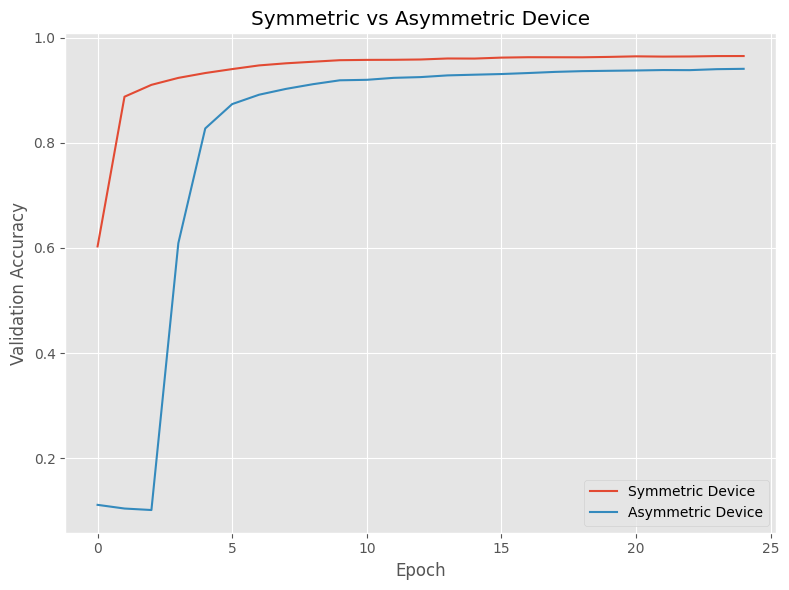

In [4]:
symmetric_data = pd.read_csv(PATH_TEST23 + 'aihwkit/pulsedAmplitudeSweep_DCIV[LBE247_ID294YR(1)]20240919110516/metrics.csv')
asymmetric_data = pd.read_csv(PATH_TEST23 + 'aihwkit/pulsedAmplitudeSweep_DCIV[LBE247_ID294YR(3)]20240919111350/metrics.csv')


fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(symmetric_data['epoch'], symmetric_data['val_acc'], label="Symmetric Device")
ax.plot(asymmetric_data['epoch'], asymmetric_data['val_acc'], label="Asymmetric Device")
ax.set(xlabel='Epoch', ylabel='Validation Accuracy', title='Symmetric vs Asymmetric Device')
ax.legend()
plt.tight_layout()
plt.savefig(FIGURES_PATH + 'symmetric_vs_asymmetric_device.png')
plt.show()

/scratch/msc24h18/msc_project/src/msc_project/utils/plot_utils.py:498: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  metadata = metadata.apply(pd.to_numeric, errors='ignore')
/scratch/msc24h18/msc_project/src/msc_project/utils/plot_utils.py:498: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  metadata = metadata.apply(pd.to_numeric, errors='ignore')


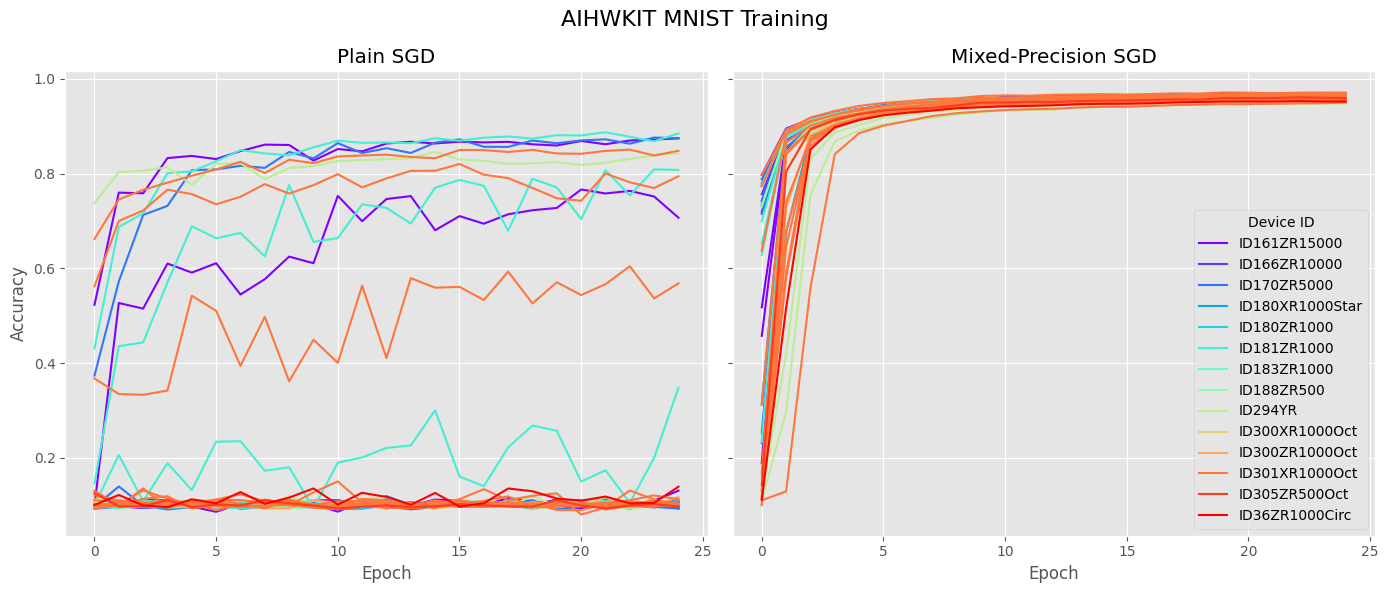

In [5]:
args = Args()
args.input = PATH_TEST50 + 'aihwkit'
args.x = 'epoch'
args.y = 'val_acc'
args.hue = 'device_id'
args.huescale = 'linear'
args.huelabel = "Device ID"

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
pu._plot_pytorch(fig, axs[0], args)
args.input = PATH_TEST52 + '/aihwkit'
pu._plot_pytorch(fig, axs[1], args)

axs[0].legend_ = None

axs[0].set(title = "Plain SGD", xlabel = "Epoch", ylabel = "Accuracy")
axs[1].set(title = "Mixed-Precision SGD", xlabel = "Epoch")
fig.suptitle("AIHWKIT MNIST Training", fontsize=16)
plt.tight_layout()
plt.savefig(FIGURES_PATH + 'aihwkit_mnist_training.png')
plt.show()

Filtering data based on dw_min_std = [0]
Filtering data based on write_noise_std = [0]
Filtering data based on w_min_dtod = [0]
Filtering data based on dw_min_std = [0]
Filtering data based on write_noise_std = [0]
Filtering data based on w_min_dtod = [0]


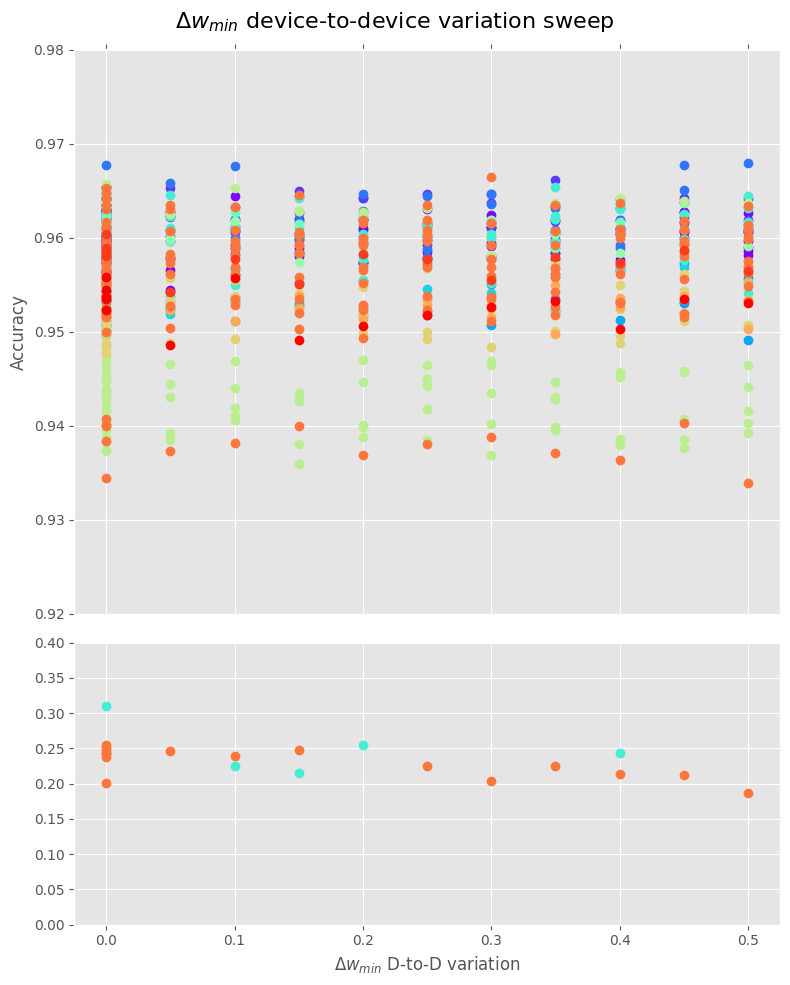

Filtering data based on dw_min_dtod = [0]
Filtering data based on write_noise_std = [0]
Filtering data based on w_min_dtod = [0]
Filtering data based on dw_min_dtod = [0]
Filtering data based on write_noise_std = [0]
Filtering data based on w_min_dtod = [0]


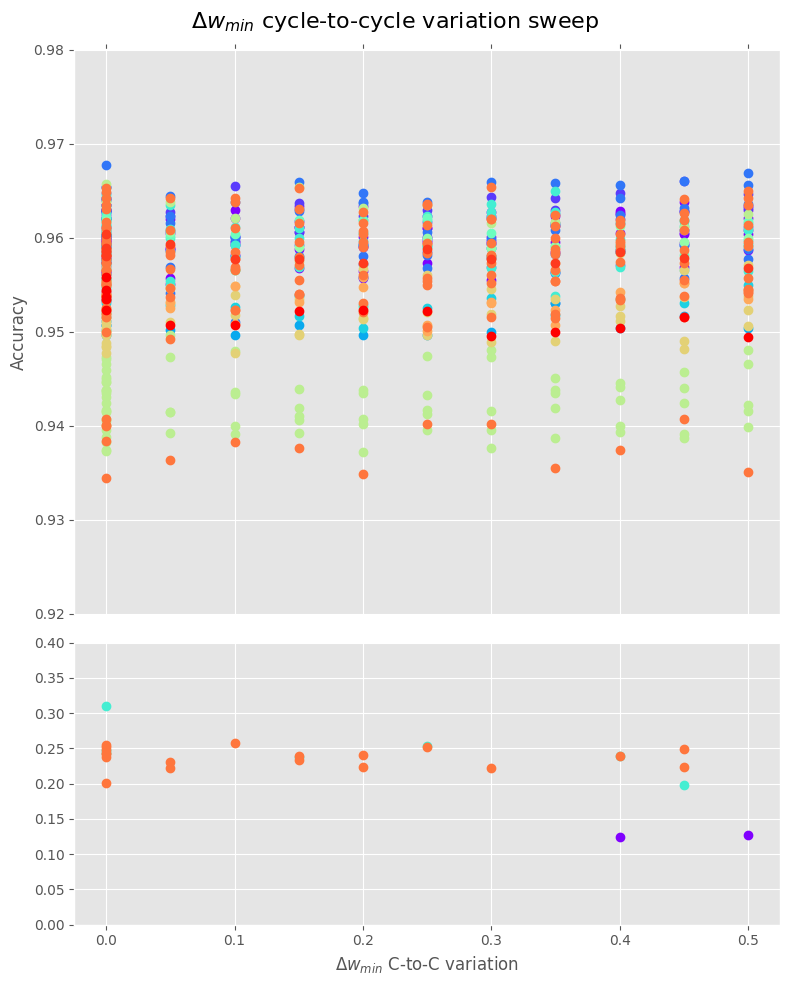

Filtering data based on dw_min_dtod = [0]
Filtering data based on dw_min_std = [0]
Filtering data based on w_min_dtod = [0]
Filtering data based on dw_min_dtod = [0]
Filtering data based on dw_min_std = [0]
Filtering data based on w_min_dtod = [0]


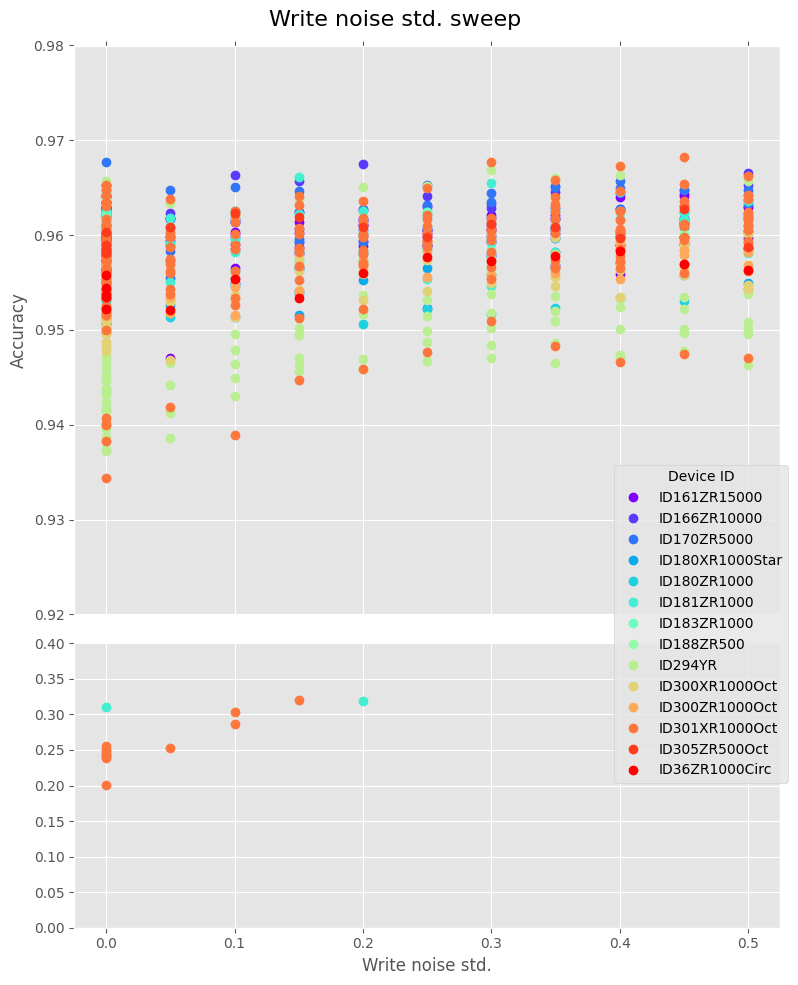

In [7]:
# dw_min_dtod #######################################################

args = Args()
args.input = PATH_TEST31 + 'all.csv'
args.x = 'dw_min_dtod'
args.y = 'val_acc'
args.hue = 'device_id'
args.huescale = 'linear'
args.huelabel = "Device ID"
args.filter = [["dw_min_std", 0], ["write_noise_std", 0], ["w_min_dtod", 0]]

fig, axs = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [2, 1]}, sharex=True)
fig.subplots_adjust(hspace=0.05)

pu._plot_summary(fig, axs[0], args)
pu._plot_summary(fig, axs[1], args)

axs[0].legend_ = None
axs[1].legend_ = None

axs[0].set(ylabel = "Accuracy", ylim = (0.92, 0.98))
axs[1].set(xlabel = "$\Delta w_{{min}}$ D-to-D variation", ylim = (0, 0.4))

# hide the spines between ax and ax2
axs[0].spines.bottom.set_visible(False)
axs[1].spines.top.set_visible(False)
axs[0].xaxis.tick_top()
axs[0].tick_params(labeltop=False)  # don't put tick labels at the top
axs[1].xaxis.tick_bottom()

fig.suptitle("$\Delta w_{{min}}$ device-to-device variation sweep", fontsize=16)
plt.tight_layout()
plt.savefig(FIGURES_PATH + 'aihwkit_dw_min_dtod_sweep.png')
plt.show()


# dw_min_std ##########################################################

args.input = PATH_TEST31 + 'all.csv'
args.x = 'dw_min_std'
args.y = 'val_acc'
args.hue = 'device_id'
args.huescale = 'linear'
args.huelabel = "Device ID"
args.filter = [["dw_min_dtod", 0], ["write_noise_std", 0], ["w_min_dtod", 0]]

fig, axs = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [2, 1]}, sharex=True)
fig.subplots_adjust(hspace=0.05)

pu._plot_summary(fig, axs[0], args)
pu._plot_summary(fig, axs[1], args)

axs[0].legend_ = None
axs[1].legend_ = None

axs[0].set(ylabel = "Accuracy", ylim = (0.92, 0.98))
axs[1].set(xlabel = "$\Delta w_{{min}}$ C-to-C variation", ylim = (0, 0.4))

# hide the spines between ax and ax2
axs[0].spines.bottom.set_visible(False)
axs[1].spines.top.set_visible(False)
axs[0].xaxis.tick_top()
axs[0].tick_params(labeltop=False)  # don't put tick labels at the top
axs[1].xaxis.tick_bottom()

fig.suptitle("$\Delta w_{{min}}$ cycle-to-cycle variation sweep", fontsize=16)
plt.tight_layout()
plt.savefig(FIGURES_PATH + 'aihwkit_dw_min_std_sweep.png')
plt.show()


# write_noise_std #######################################################

args.input = PATH_TEST31 + 'all.csv'
args.x = 'write_noise_std'
args.y = 'val_acc'
args.hue = 'device_id'
args.huescale = 'linear'
args.huelabel = "Device ID"
args.filter = [["dw_min_dtod", 0], ["dw_min_std", 0], ["w_min_dtod", 0]]

fig, axs = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [2, 1]}, sharex=True)
fig.subplots_adjust(hspace=0.05)

pu._plot_summary(fig, axs[0], args)
pu._plot_summary(fig, axs[1], args)

# axs[0].legend(loc='lower right', bbox_to_anchor=(1, 0), title="Device ID")
handles, labels = axs[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc='lower right', bbox_to_anchor=(1, 0.2), title="Device ID")

axs[1].legend_ = None
axs[0].legend_ = None

axs[0].set(ylabel = "Accuracy", ylim = (0.92, 0.98))
axs[1].set(xlabel = "Write noise std.", ylim = (0, 0.4))

# hide the spines between ax and ax2
axs[0].spines.bottom.set_visible(False)
axs[1].spines.top.set_visible(False)
axs[0].xaxis.tick_top()
axs[0].tick_params(labeltop=False)  # don't put tick labels at the top
axs[1].xaxis.tick_bottom()

fig.suptitle("Write noise std. sweep", fontsize=16)
plt.tight_layout()
plt.savefig(FIGURES_PATH + 'aihwkit_write_noise_std_sweep.png')
plt.show()


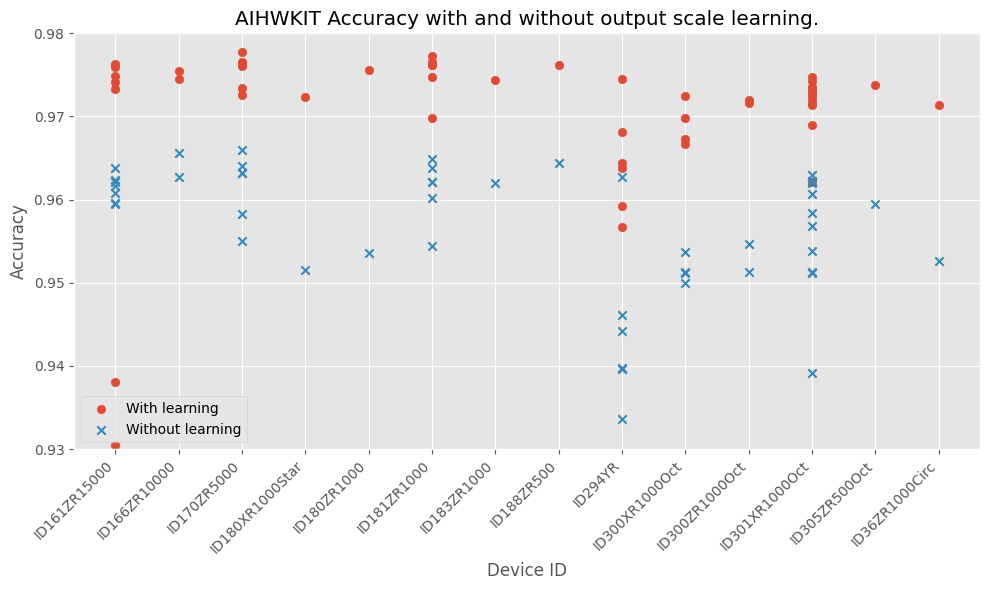

In [8]:
# learn out scaling comparison

def plot_los_comparison(csv_path_learn, csv_path_no_learn, savefig, **kwargs):
    data_learn = pd.read_csv(csv_path_learn)
    data_nolearn = pd.read_csv(csv_path_no_learn)

    data_learn.sort_values(by=['device_id', 'test_time'], inplace=True)
    data_nolearn.sort_values(by=['device_id', 'test_time'], inplace=True)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.scatter(data_learn['device_id'], data_learn['val_acc'], label='With learning', marker='o')
    ax.scatter(data_nolearn['device_id'], data_nolearn['val_acc'], label='Without learning', marker='x')

    ax.set_xticks(data_learn['device_id'].unique())
    ax.set_xticklabels(data_learn['device_id'].unique(), rotation=45, ha='right')

    ax.set(**kwargs)
    ax.legend()

    plt.tight_layout()
    plt.savefig(savefig)
    plt.show()


DATA_PATH_LEARN = os.path.join(PATH_TEST32, 'learn_out_scaling_wnstd_0.csv')
DATA_PATH_NOLEARN = os.path.join(PATH_TEST32, 'no_out_scaling_wnstd_0.csv')

plot_los_comparison(DATA_PATH_LEARN, DATA_PATH_NOLEARN,
                    savefig=FIGURES_PATH + 'aihwkit_learn_out_scaling.png',
                    title="AIHWKIT Accuracy with and without output scale learning.", xlabel='Device ID', ylabel='Accuracy', ylim=(0.93, 0.98))

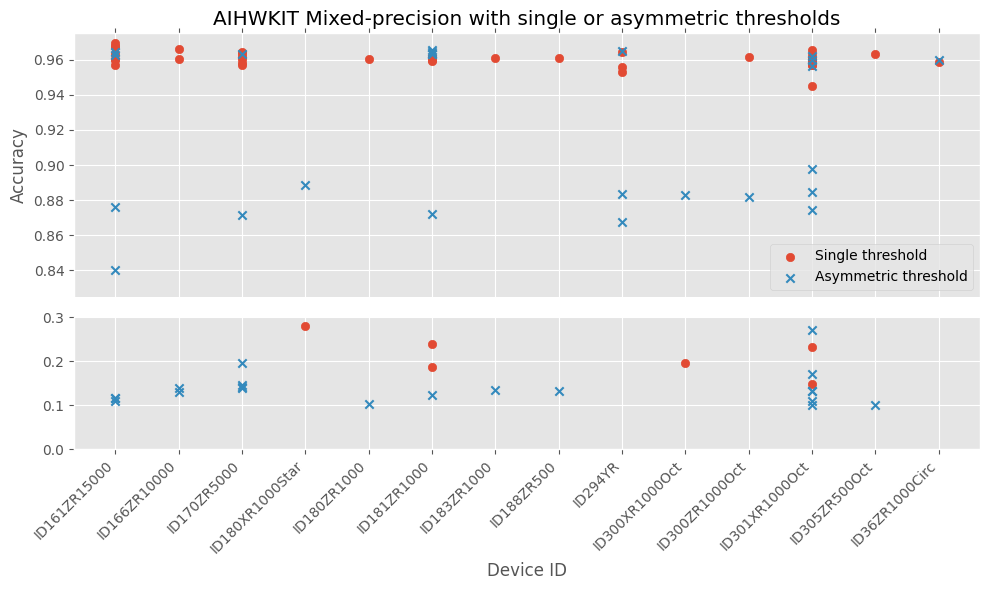

In [21]:
# multi-threshold mp comparison

def plot_mp_comparison(csv_path_symmetric, csv_path_asymmetric, savefig, **kwargs):
    data_symmetric = pd.read_csv(csv_path_symmetric)
    data_asymmetric = pd.read_csv(csv_path_asymmetric)

    data_symmetric.sort_values(by=['device_id', 'test_time'], inplace=True)
    data_asymmetric.sort_values(by=['device_id', 'test_time'], inplace=True)
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [2, 1]}, sharex=True)
    fig.subplots_adjust(hspace=0.05)
    
    axs[0].scatter(data_symmetric['device_id'], data_symmetric['val_acc'], label='Single threshold', marker='o')
    axs[0].scatter(data_asymmetric['device_id'], data_asymmetric['val_acc'], label='Asymmetric threshold', marker='x')
    axs[1].scatter(data_symmetric['device_id'], data_symmetric['val_acc'], label='Single threshold', marker='o')
    axs[1].scatter(data_asymmetric['device_id'], data_asymmetric['val_acc'], label='Asymmetric threshold', marker='x')

    axs[0].set_xticks(data_symmetric['device_id'].unique())
    axs[1].set_xticklabels(data_symmetric['device_id'].unique(), rotation=45, ha='right')

    axs[0].set(ylim=(0.825, 0.975), **kwargs)
    axs[0].set(xlabel='')
    axs[1].set(ylim=(0, 0.3), **kwargs)
    axs[1].set(title='', ylabel='')

    # hide the spines between ax and ax2
    axs[0].spines.bottom.set_visible(False)
    axs[1].spines.top.set_visible(False)
    axs[0].xaxis.tick_top()
    axs[0].tick_params(labeltop=False)  # don't put tick labels at the top
    axs[1].xaxis.tick_bottom()

    axs[0].legend()

    plt.tight_layout()
    plt.savefig(savefig)
    plt.show()

DATA_PATH_SYMMETRIC = PATH_TEST46 + 'symmetric.csv'
DATA_PATH_ASYMMETRIC = PATH_TEST46 + 'asymmetric.csv'

plot_mp_comparison(DATA_PATH_SYMMETRIC, DATA_PATH_ASYMMETRIC, FIGURES_PATH + "aihwkit_asymmetric_mp.png",
                   title="AIHWKIT Mixed-precision with single or asymmetric thresholds", xlabel='Device ID', ylabel='Accuracy')